### Intelligent agents. Q-learning algorithms
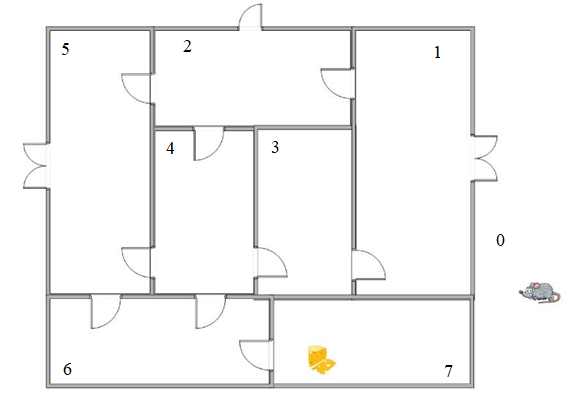
Based on the picture above, build a mathematical model of an intelligent agent and its external environment. Suppose we have a house with 7 rooms that are connected by doors as shown in the figure above. Let's number each room from 1 to 7, and assign the number 0 to the street. The goal of the agent is to get some cheese (to reach state 7).

In [1]:
import numpy as np
import pylab as plt
data_points = [(0,1), (0,2), (0,5), (1,2), (1,3), (2,3), (2,4), (2,5), (3,4), (4,5), (5,6), (6,7), (7,7)]
goal = 7

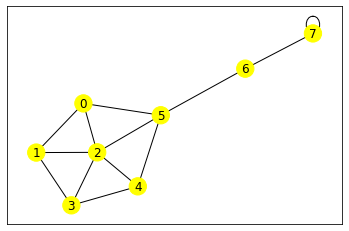

In [2]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(data_points)
pos = nx.spring_layout(G)

def draw_net(steps, G, pos):
    ncolor_map = []
    if sum(steps) > 0:
        for node in G:
            if node in steps[:-1]:
                ncolor_map.append('brown')
            elif node == steps[-1]:
                ncolor_map.append('green')
            else: 
                ncolor_map.append('yellow') 
    else:
        for node in G:
            ncolor_map.append('yellow') 
    
    nx.draw_networkx_nodes(G,pos,node_color=ncolor_map)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)

    plt.show()
    
short_path = [0]*goal
draw_net(short_path, G, pos)

In [3]:
MATRIX_SIZE = goal + 1
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))  # create reward matrix
R *= -1

In [4]:
for point in data_points: # assign points for reaching goal and for not reaching goal
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0
        R[goal,goal] = 100
R

matrix([[ -1.,   0.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,   0.,  -1.,   0.,   0.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,   0.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0., 100.]])

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) # create matrix model filling with zeros
gamma = 0.8 
initial_state = 1

In [6]:
def possible_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
possible_act = possible_actions(initial_state)
print('All available start_point: {0}'.format(possible_act))

def sample_action(possible_actions_range):
    next_action = int(np.random.choice(possible_act,1))
    return next_action
action = sample_action(possible_act)

action = 0

print('Start_point is {0}'.format(action))

All available start_point: [0 2 3]
Start_point is 0


In [7]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return (np.sum(Q/np.max(Q)*100)) 
    else:
        return (0)
update(initial_state, action, gamma)

0

In [8]:
scores = []
for i in range(2000):
    current_state = np.random.randint(0, int(Q.shape[0])) 
    possible_act = possible_actions(current_state)
    action = sample_action(possible_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    
print("Q matrix after training:")
print(np.around(Q/np.max(Q)*100,2))
print(np.around(Q,2))

Q matrix after training:
[[  0.    40.96  51.2    0.     0.    64.     0.     0.  ]
 [ 51.2    0.    51.2   40.96   0.     0.     0.     0.  ]
 [ 51.2   40.96   0.    40.96  51.2   64.     0.     0.  ]
 [  0.    40.96  51.2    0.    51.2    0.     0.     0.  ]
 [  0.     0.    51.2   40.96   0.    64.     0.     0.  ]
 [ 51.2    0.    51.2    0.    51.2    0.    80.     0.  ]
 [  0.     0.     0.     0.     0.    64.     0.   100.  ]
 [  0.     0.     0.     0.     0.     0.    80.   100.  ]]
[[  0.  204.8 256.    0.    0.  320.    0.    0. ]
 [256.    0.  256.  204.8   0.    0.    0.    0. ]
 [256.  204.8   0.  204.8 256.  320.    0.    0. ]
 [  0.  204.8 256.    0.  256.    0.    0.    0. ]
 [  0.    0.  256.  204.8   0.  320.    0.    0. ]
 [256.    0.  256.    0.  256.    0.  400.    0. ]
 [  0.    0.    0.    0.    0.  320.    0.  500. ]
 [  0.    0.    0.    0.    0.    0.  400.  500. ]]


Most efficient path:
[0, 5, 6, 7]


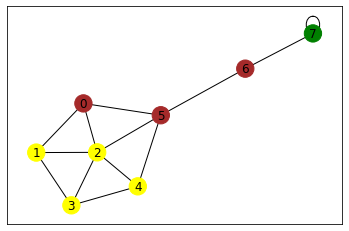

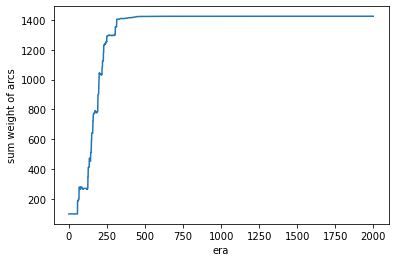

In [9]:
current_state = 0
steps = [current_state]
while current_state != goal:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("Most efficient path:")
print(steps)
draw_net(steps, G, pos)
plt.plot(scores)

ax = plt.gca()
ax.set_xlabel("era"); ax.set_ylabel("sum weight of arcs") 
plt.show()